Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 3, 13, 5, 5, 3, 6, 10, 4, 11,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 126, 145, 117, 109, 88…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 88, 82, 92, 75, 58, 92, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 41, 19, 0, 26, 11, 0, 31, 33…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 235, 110, 0, 0, 54, 0, 0, 192…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 39.3, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 0.704, 0.2…
$ Age                      <dbl> 31, 21, 30, 29, 30, 27, 57, 38, 60, 22, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

the outcome variable is suitable for a logistic regression model, this feels wrong because it is named outcome 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |   Plasma glucose concentration a 2 hours in an oral glucose tolerance test           |
| BMI         |   Body mass index (weight in kg/(height in m)^2)         |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

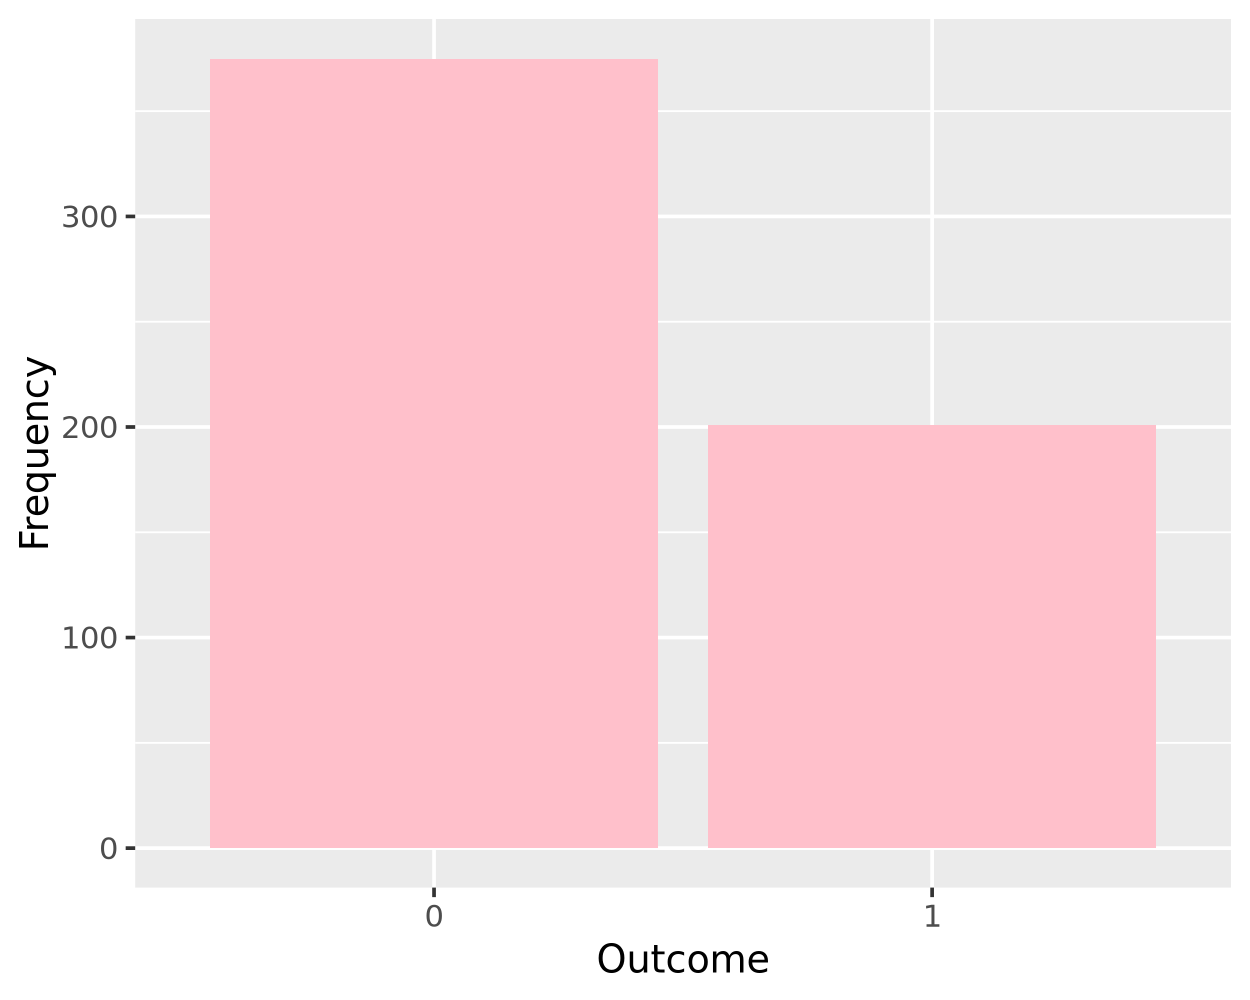

In [4]:
outcome_counts <- diabetes_train |>
  count(Outcome)


ggplot(outcome_counts, aes(x = as.factor(Outcome), y = n)) +
  geom_bar(stat = "identity", fill = "pink") +
  labs(x = "Outcome", y = "Frequency")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**


No there is not equal counts of each outcome, 0 is the outcome almost twice as much as 1


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

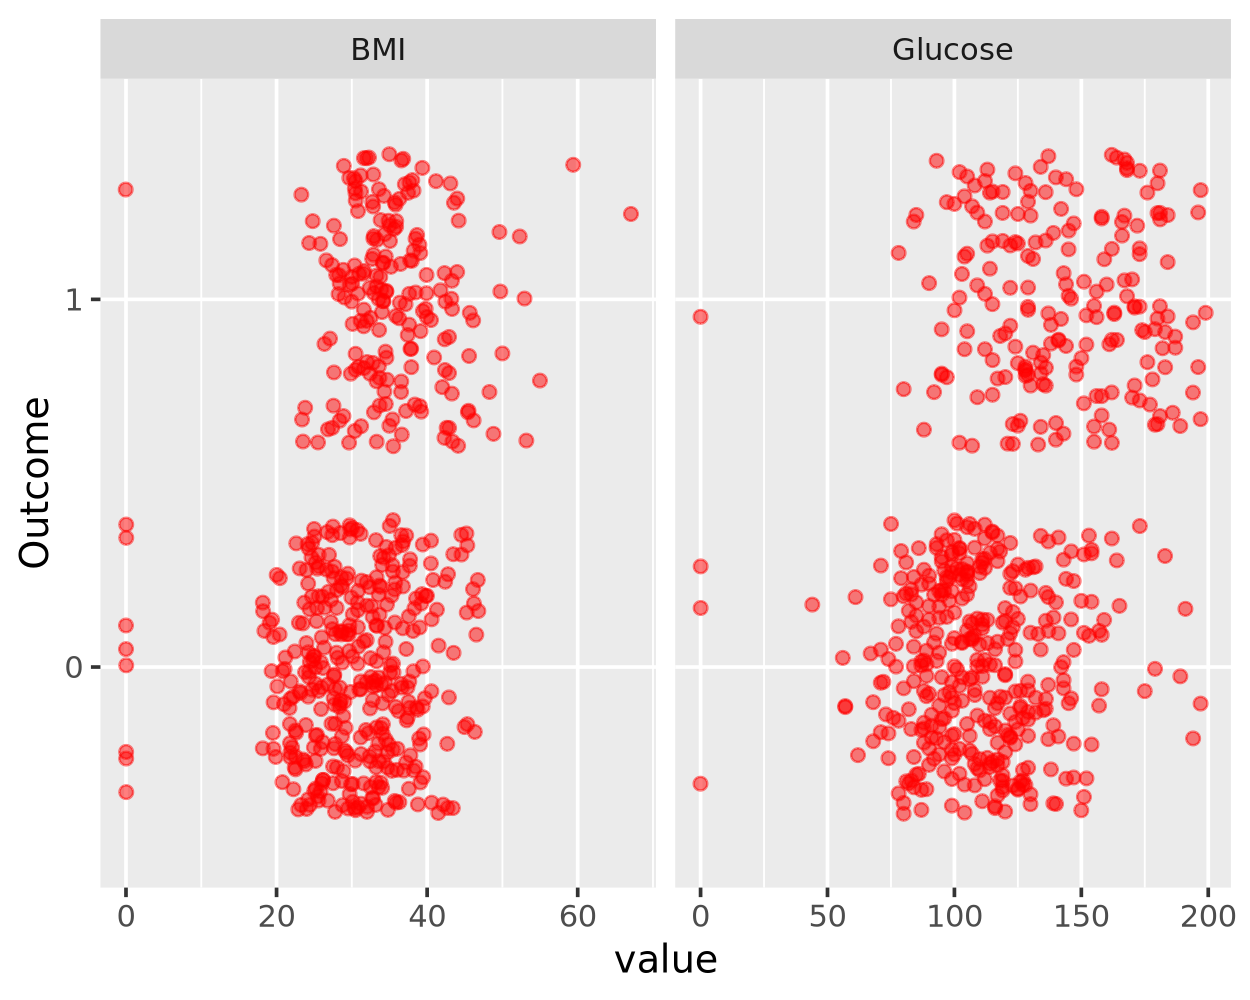

In [6]:
ggplot(plot_df, aes(x = value, y = Outcome))+
geom_jitter(alpha = .5, color = "red") +
facet_wrap(~name, ncol = 2, scales = 'free_x')



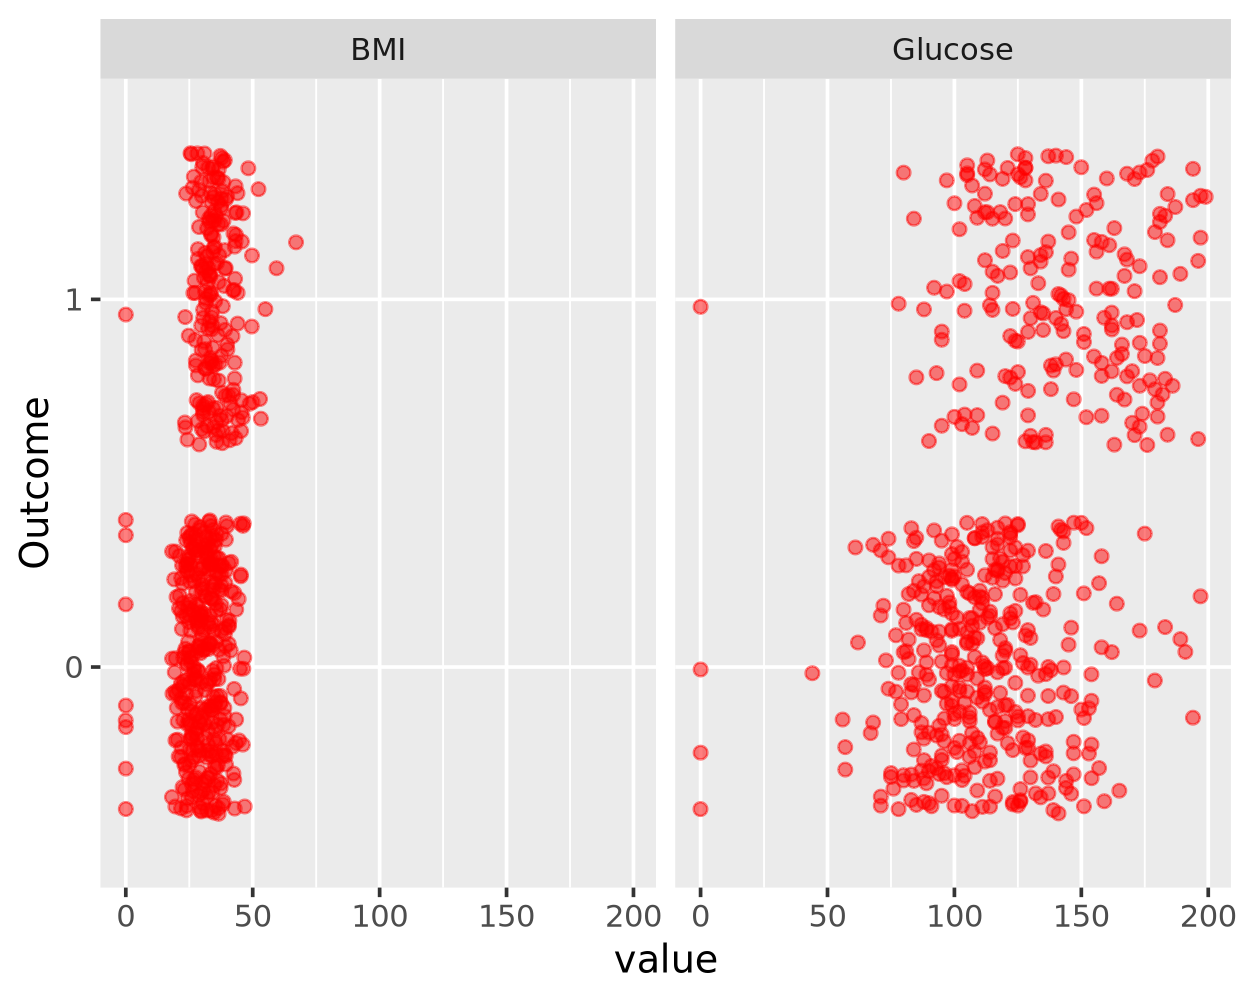

In [7]:
ggplot(plot_df, aes(x = value, y = Outcome))+
geom_jitter(alpha = .5, color = "red") +
facet_wrap(~name, ncol = 2)



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

This makes the x axis on the same scale for each graph so since the values for BMI are smaller than the values for Glucose all the points are much closer together and overlapping

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:

mod = logistic_reg() |> set_engine('glm')


mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(mod_fit)



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.19351851,0.747027878,-10.968156,5.436973e-28
BMI,0.09053407,0.015999764,5.658463,1.527349e-08
Glucose,0.03658388,0.003908106,9.361026,7.896635e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:

diabetes_test_wPred <- augment(mod_fit, diabetes_test)
head(diabetes_test_wPred)



.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9739295,0.02607052,8,125,96,0,0,0.0,0.232,54,1
0,0.6581107,0.34188932,10,139,80,0,0,27.1,1.441,57,0
1,0.1906318,0.80936820,1,189,60,23,846,30.1,0.398,59,1
1,0.4329465,0.56705350,0,118,84,47,230,45.8,0.551,31,1
0,0.6236932,0.37630679,1,103,30,38,83,43.3,0.183,33,0
0,0.7968640,0.20313597,8,99,84,0,0,35.4,0.388,50,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  36
         1  15  31

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

67 people actually have diabetes
31 were correctly predicted to have diabetes by the model
15 were predicted to have diabetes who did not have diabetes

